### Notebook notes

Looking at laterally averaged boundary conditions, conditions for LiveOcean_v201905_
available

#### available variables:
vosaline,votemper,NO3,Si,OXY,DIC,TA

#### plan - look at interannual variability in T,S, DIC, NO3 
#### make a 2016-2019 averaged climatology
#$PROJECT/SalishSea/forcing/LiveOcean

In [99]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [100]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [101]:
import netCDF4 as nc
import arrow
import numpy as np
import pickle
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15,
                     'xtick.labelsize' : 15,
                     'ytick.labelsize' : 15})

##### daily laterally-averaged DIC, NO3, T, S, OXY for 2015-2019 LiveOcean (code same for 2016-2019, pkls in ./pkls)

In [102]:
# # PICKLE code:
# T_2015= np.zeros([40,366])
# S_2015= np.zeros([40,366])
# DIC_2015= np.zeros([40,366])
# NO3_2015 = np.zeros([40,366])
# OXY_2015 = np.zeros([40,366])

# #open yearly, get, pickle
# start = '2015-01-01'
# end = '2015-12-31'
# #y2015m12d13.nc'
# start_run = arrow.get(start)
# end_run = arrow.get(end)
# arrow_array = []
# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array.append(r)

# dayslen = len(arrow_array)
# for i in range(0,dayslen):
#     tdate = arrow_array[i][0]
#     y = tdate.format('YYYY')
#     m = tdate.format('MM')
#     d = tdate.format('DD')
#     #votemper,vosaline,DIC,NO3,OXY
#     #tdat = f'y'+y+'m'+m+'d'+d    
#     tdat = f"/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_y{y}m{m}d{d}.nc"
#     if i%60 == 0:
#         print(tdat)
#     #w = nc.Dataset
#     q = nc.Dataset(tdat)
    
#     DIC = q['DIC'][0,:,0,:]; DIC = np.mean(DIC,axis = 1)
#     DIC_2015[:,i] = DIC
    
#     T = q['votemper'][0,:,0,:]; T = np.mean(T,axis = 1)
#     T_2015[:,i] = T
    
#     NO3 = q['NO3'][0,:,0,:]; NO3 = np.mean(NO3,axis = 1)
#     NO3_2015[:,i] = NO3
    
#     S = q['vosaline'][0,:,0,:]; S = np.mean(S,axis = 1)
#     S_2015[:,i] = S
    
#     OXY = q['votemper'][0,:,0,:]; OXY = np.mean(OXY,axis = 1)
#     OXY_2015[:,i] = OXY
    
    
# pickle.dump(T_2015, open("./pkls/T_2015.pkl", 'wb'))
# pickle.dump(S_2015, open("./pkls/S_2015.pkl", 'wb'))
# pickle.dump(DIC_2015, open("./pkls/DIC_2015.pkl", 'wb'))
# pickle.dump(NO3_2015, open("./pkls/NO3_2015.pkl", 'wb'))
# pickle.dump(OXY_2015, open("./pkls/OXY_2015.pkl", 'wb'))

# # hindcast2008_wind_mag = pickle.load(open('./pkls_hindcast201905_airseaflux/hindcast2008_wind_mag.pkl', 'rb'))  


In [103]:
T_2015 = pickle.load(open('./pkls/T_2015.pkl', 'rb'))  
S_2015 = pickle.load(open('./pkls/S_2015.pkl', 'rb'))  
DIC_2015 = pickle.load(open('./pkls/DIC_2015.pkl', 'rb'))  
NO3_2015 = pickle.load(open('./pkls/NO3_2015.pkl', 'rb'))  
OXY_2015 = pickle.load(open('./pkls/OXY_2015.pkl', 'rb'))  
T_2016 = pickle.load(open('./pkls/T_2016.pkl', 'rb'))  
S_2016 = pickle.load(open('./pkls/S_2016.pkl', 'rb'))  
DIC_2016 = pickle.load(open('./pkls/DIC_2016.pkl', 'rb'))  
NO3_2016 = pickle.load(open('./pkls/NO3_2016.pkl', 'rb'))  
OXY_2016 = pickle.load(open('./pkls/OXY_2016.pkl', 'rb'))  
T_2017 = pickle.load(open('./pkls/T_2017.pkl', 'rb'))  
S_2017 = pickle.load(open('./pkls/S_2017.pkl', 'rb'))  
DIC_2017 = pickle.load(open('./pkls/DIC_2017.pkl', 'rb'))  
NO3_2017 = pickle.load(open('./pkls/NO3_2017.pkl', 'rb'))  
OXY_2017 = pickle.load(open('./pkls/OXY_2017.pkl', 'rb'))  
T_2018 = pickle.load(open('./pkls/T_2018.pkl', 'rb'))  
S_2018 = pickle.load(open('./pkls/S_2018.pkl', 'rb'))  
DIC_2018 = pickle.load(open('./pkls/DIC_2018.pkl', 'rb'))  
NO3_2018 = pickle.load(open('./pkls/NO3_2018.pkl', 'rb'))  
OXY_2018 = pickle.load(open('./pkls/OXY_2018.pkl', 'rb'))  
T_2019 = pickle.load(open('./pkls/T_2019.pkl', 'rb'))  
S_2019 = pickle.load(open('./pkls/S_2019.pkl', 'rb'))  
DIC_2019 = pickle.load(open('./pkls/DIC_2019.pkl', 'rb'))  
NO3_2019 = pickle.load(open('./pkls/NO3_2019.pkl', 'rb'))  
OXY_2019 = pickle.load(open('./pkls/OXY_2019.pkl', 'rb'))  



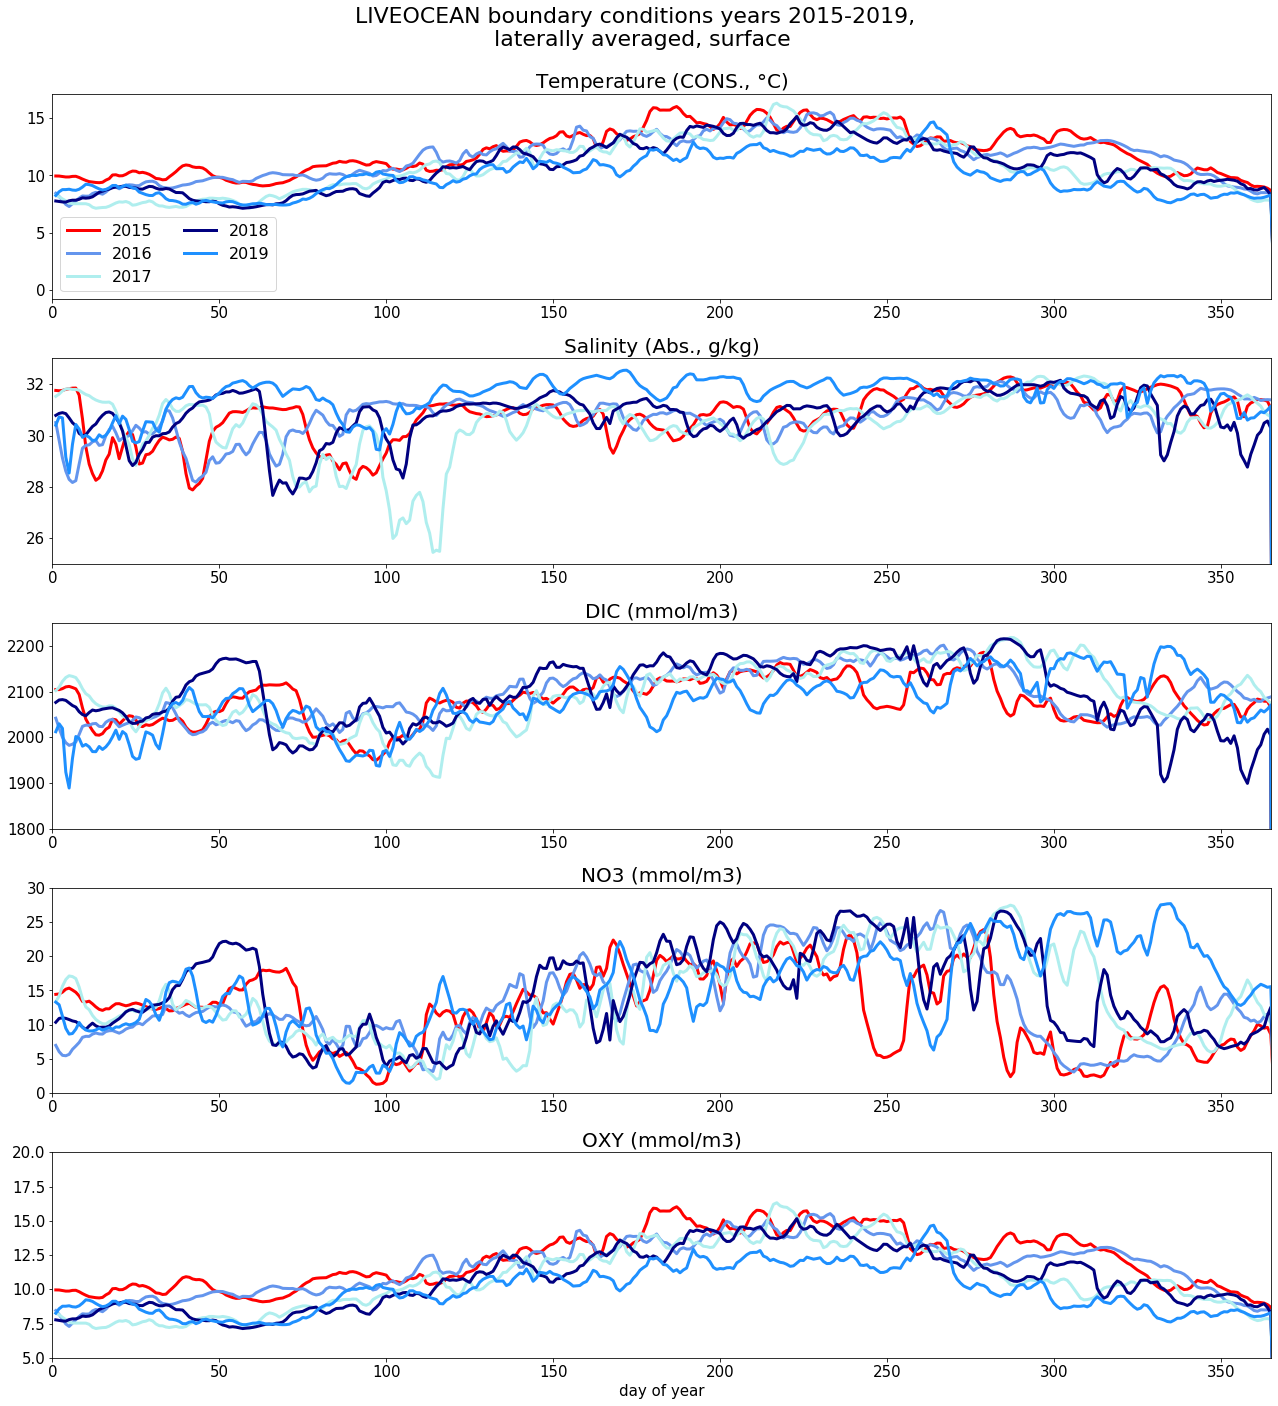

In [104]:
day = np.arange(1,367,1)
fig = plt.figure(figsize=(18,22))

for i in range(1,6):
    ax = fig.add_subplot(6,1,i)

    #puget
    if i == 1:
        ax.plot(day, T_2015[0,:], label = '2015', lw = 3, color='red')
        ax.plot(day, T_2016[0,:], label = '2016', lw = 3, color='cornflowerblue')
        ax.plot(day, T_2017[0,:], label = '2017', lw = 3, color='paleturquoise')
        ax.plot(day, T_2018[0,:], label = '2018', lw = 3, color='navy')
        ax.plot(day, T_2019[0,:], label = '2019', lw = 3, color='dodgerblue')
        
        ax.set_xlim([0,365])
        ax.legend(loc="best", ncol = 2, fontsize = 16 )
        ax.set_title('Temperature (CONS., $\degree$C)', fontsize = 20 )
        
    if i == 2:
        ax.plot(day, S_2015[0,:], label = '2015', lw = 3, color='red')
        ax.plot(day, S_2016[0,:], label = '2016', lw = 3, color='cornflowerblue')
        ax.plot(day, S_2017[0,:], label = '2017', lw = 3, color='paleturquoise')
        ax.plot(day, S_2018[0,:], label = '2018', lw = 3, color='navy')
        ax.plot(day, S_2019[0,:], label = '2019', lw = 3, color='dodgerblue')
        
        ax.set_xlim([0,365])
        ax.set_ylim([25,33])
        #ax.legend(loc="best", ncol = 2, fontsize = 16 )
        ax.set_title('Salinity (Abs., g/kg)', fontsize = 20 )
 
    if i == 3:
        ax.plot(day, DIC_2015[0,:], label = '2015', lw = 3, color='red')
        ax.plot(day, DIC_2016[0,:], label = '2016', lw = 3, color='cornflowerblue')
        ax.plot(day, DIC_2017[0,:], label = '2017', lw = 3, color='paleturquoise')
        ax.plot(day, DIC_2018[0,:], label = '2018', lw = 3, color='navy')
        ax.plot(day, DIC_2019[0,:], label = '2019', lw = 3, color='dodgerblue')
        
        ax.set_xlim([0,365])
        ax.set_ylim([1800,2250])
        #ax.legend(loc="best", ncol = 2, fontsize = 16 )
        ax.set_title('DIC (mmol/m3)', fontsize = 20 )
 
    if i == 4:
        ax.plot(day, NO3_2015[0,:], label = '2015', lw = 3, color='red')
        ax.plot(day, NO3_2016[0,:], label = '2016', lw = 3, color='cornflowerblue')
        ax.plot(day, NO3_2017[0,:], label = '2017', lw = 3, color='paleturquoise')
        ax.plot(day, NO3_2018[0,:], label = '2018', lw = 3, color='navy')
        ax.plot(day, NO3_2019[0,:], label = '2019', lw = 3, color='dodgerblue')
        
        ax.set_xlim([0,365])
        ax.set_ylim([0,30])
        #ax.legend(loc="best", ncol = 2, fontsize = 16 )
        ax.set_title('NO3 (mmol/m3)', fontsize = 20 )
        
    if i == 5:
        ax.plot(day, OXY_2015[0,:], label = '2015', lw = 3, color='red')
        ax.plot(day, OXY_2016[0,:], label = '2016', lw = 3, color='cornflowerblue')
        ax.plot(day, OXY_2017[0,:], label = '2017', lw = 3, color='paleturquoise')
        ax.plot(day, OXY_2018[0,:], label = '2018', lw = 3, color='navy')
        ax.plot(day, OXY_2019[0,:], label = '2019', lw = 3, color='dodgerblue')
        ax.set_xlabel('day of year')
        
        ax.set_xlim([0,365])
        ax.set_ylim([5,20])
        #ax.legend(loc="best", ncol = 2, fontsize = 16 )
        ax.set_title('OXY (mmol/m3)', fontsize = 20 )
        
plt.suptitle('LIVEOCEAN boundary conditions years 2015-2019, \n laterally averaged, surface',\
             fontsize = 22, y = 1.03)
plt.tight_layout()

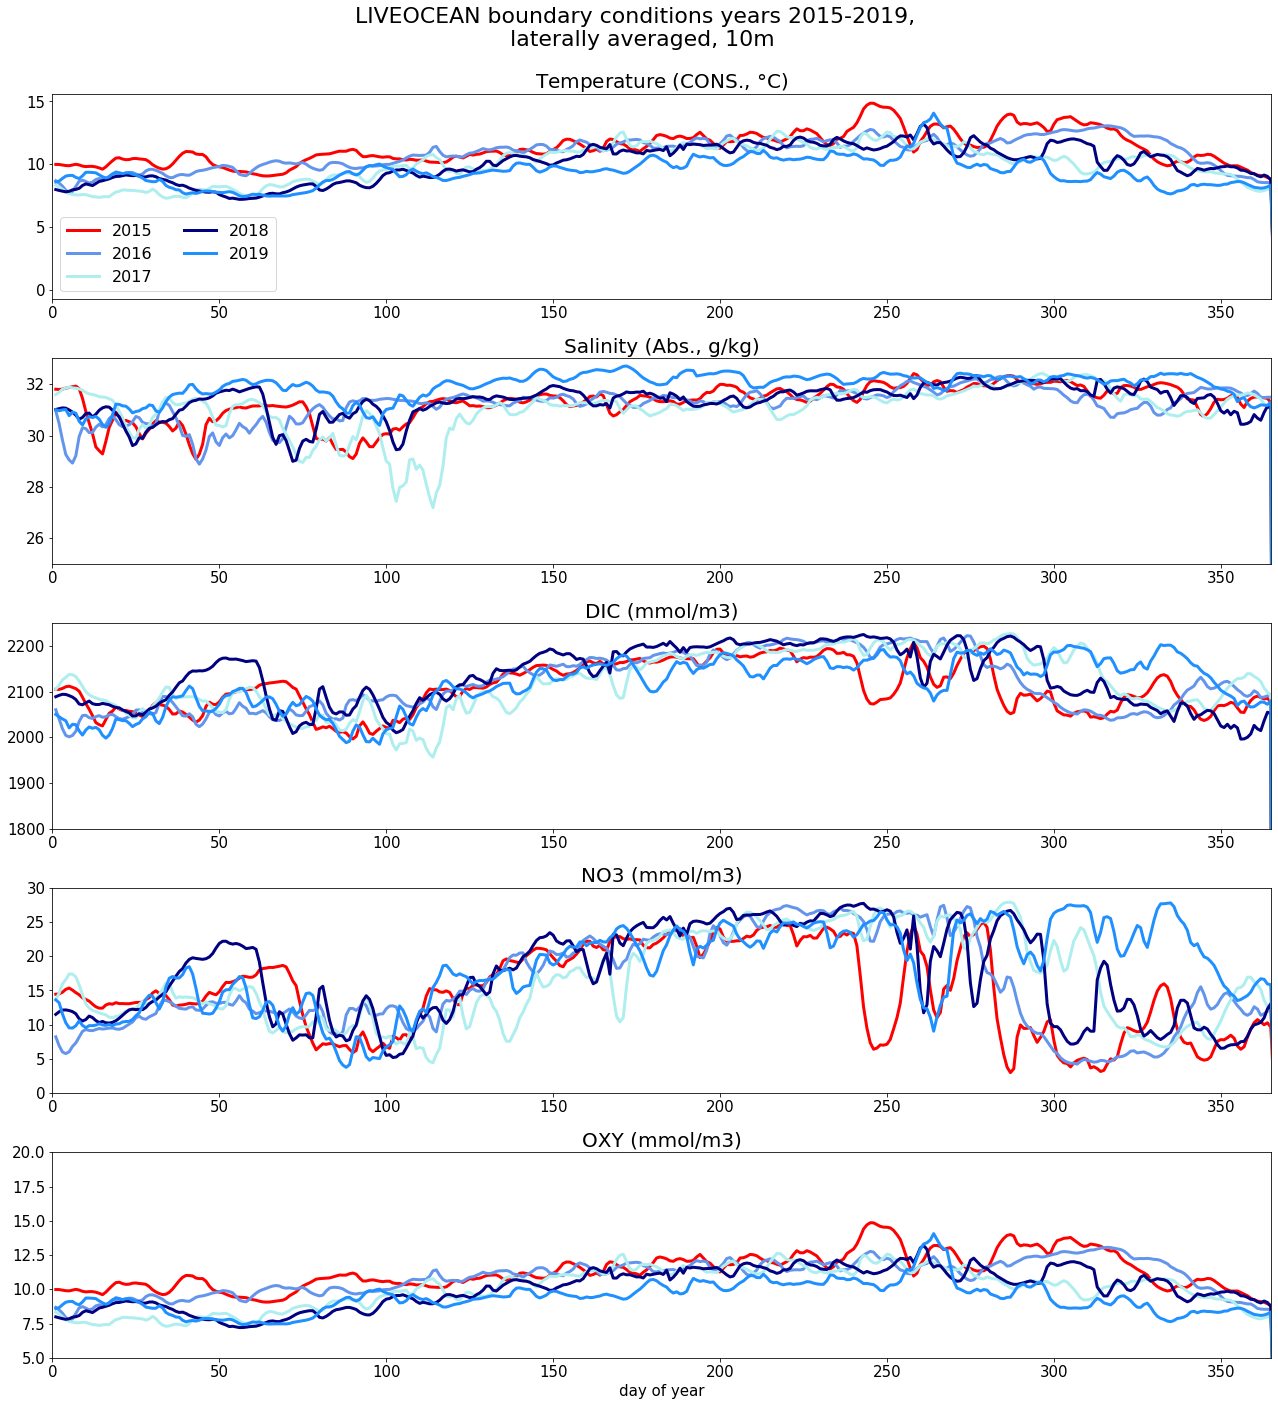

In [105]:
day = np.arange(1,367,1)
fig = plt.figure(figsize=(18,22))

for i in range(1,6):
    ax = fig.add_subplot(6,1,i)

    #puget
    if i == 1:
        ax.plot(day, T_2015[10,:], label = '2015', lw = 3, color='red')
        ax.plot(day, T_2016[10,:], label = '2016', lw = 3, color='cornflowerblue')
        ax.plot(day, T_2017[10,:], label = '2017', lw = 3, color='paleturquoise')
        ax.plot(day, T_2018[10,:], label = '2018', lw = 3, color='navy')
        ax.plot(day, T_2019[10,:], label = '2019', lw = 3, color='dodgerblue')
        
        ax.set_xlim([0,365])
        ax.legend(loc="best", ncol = 2, fontsize = 16 )
        ax.set_title('Temperature (CONS., $\degree$C)', fontsize = 20 )
        
    if i == 2:
        ax.plot(day, S_2015[10,:], label = '2015', lw = 3, color='red')
        ax.plot(day, S_2016[10,:], label = '2016', lw = 3, color='cornflowerblue')
        ax.plot(day, S_2017[10,:], label = '2017', lw = 3, color='paleturquoise')
        ax.plot(day, S_2018[10,:], label = '2018', lw = 3, color='navy')
        ax.plot(day, S_2019[10,:], label = '2019', lw = 3, color='dodgerblue')
        
        ax.set_xlim([0,365])
        ax.set_ylim([25,33])
        #ax.legend(loc="best", ncol = 2, fontsize = 16 )
        ax.set_title('Salinity (Abs., g/kg)', fontsize = 20 )
 
    if i == 3:
        ax.plot(day, DIC_2015[10,:], label = '2015', lw = 3, color='red')
        ax.plot(day, DIC_2016[10,:], label = '2016', lw = 3, color='cornflowerblue')
        ax.plot(day, DIC_2017[10,:], label = '2017', lw = 3, color='paleturquoise')
        ax.plot(day, DIC_2018[10,:], label = '2018', lw = 3, color='navy')
        ax.plot(day, DIC_2019[10,:], label = '2019', lw = 3, color='dodgerblue')
        
        ax.set_xlim([0,365])
        ax.set_ylim([1800,2250])
        #ax.legend(loc="best", ncol = 2, fontsize = 16 )
        ax.set_title('DIC (mmol/m3)', fontsize = 20 )
 
    if i == 4:
        ax.plot(day, NO3_2015[10,:], label = '2015', lw = 3, color='red')
        ax.plot(day, NO3_2016[10,:], label = '2016', lw = 3, color='cornflowerblue')
        ax.plot(day, NO3_2017[10,:], label = '2017', lw = 3, color='paleturquoise')
        ax.plot(day, NO3_2018[10,:], label = '2018', lw = 3, color='navy')
        ax.plot(day, NO3_2019[10,:], label = '2019', lw = 3, color='dodgerblue')
        
        ax.set_xlim([0,365])
        ax.set_ylim([0,30])
        #ax.legend(loc="best", ncol = 2, fontsize = 16 )
        ax.set_title('NO3 (mmol/m3)', fontsize = 20 )
        
    if i == 5:
        ax.plot(day, OXY_2015[10,:], label = '2015', lw = 3, color='red')
        ax.plot(day, OXY_2016[10,:], label = '2016', lw = 3, color='cornflowerblue')
        ax.plot(day, OXY_2017[10,:], label = '2017', lw = 3, color='paleturquoise')
        ax.plot(day, OXY_2018[10,:], label = '2018', lw = 3, color='navy')
        ax.plot(day, OXY_2019[10,:], label = '2019', lw = 3, color='dodgerblue')
        ax.set_xlabel('day of year')
        
        ax.set_xlim([0,365])
        ax.set_ylim([5,20])
        #ax.legend(loc="best", ncol = 2, fontsize = 16 )
        ax.set_title('OXY (mmol/m3)', fontsize = 20 )
        
plt.suptitle('LIVEOCEAN boundary conditions years 2015-2019, \n laterally averaged, 10m',\
             fontsize = 22, y = 1.03)
plt.tight_layout()

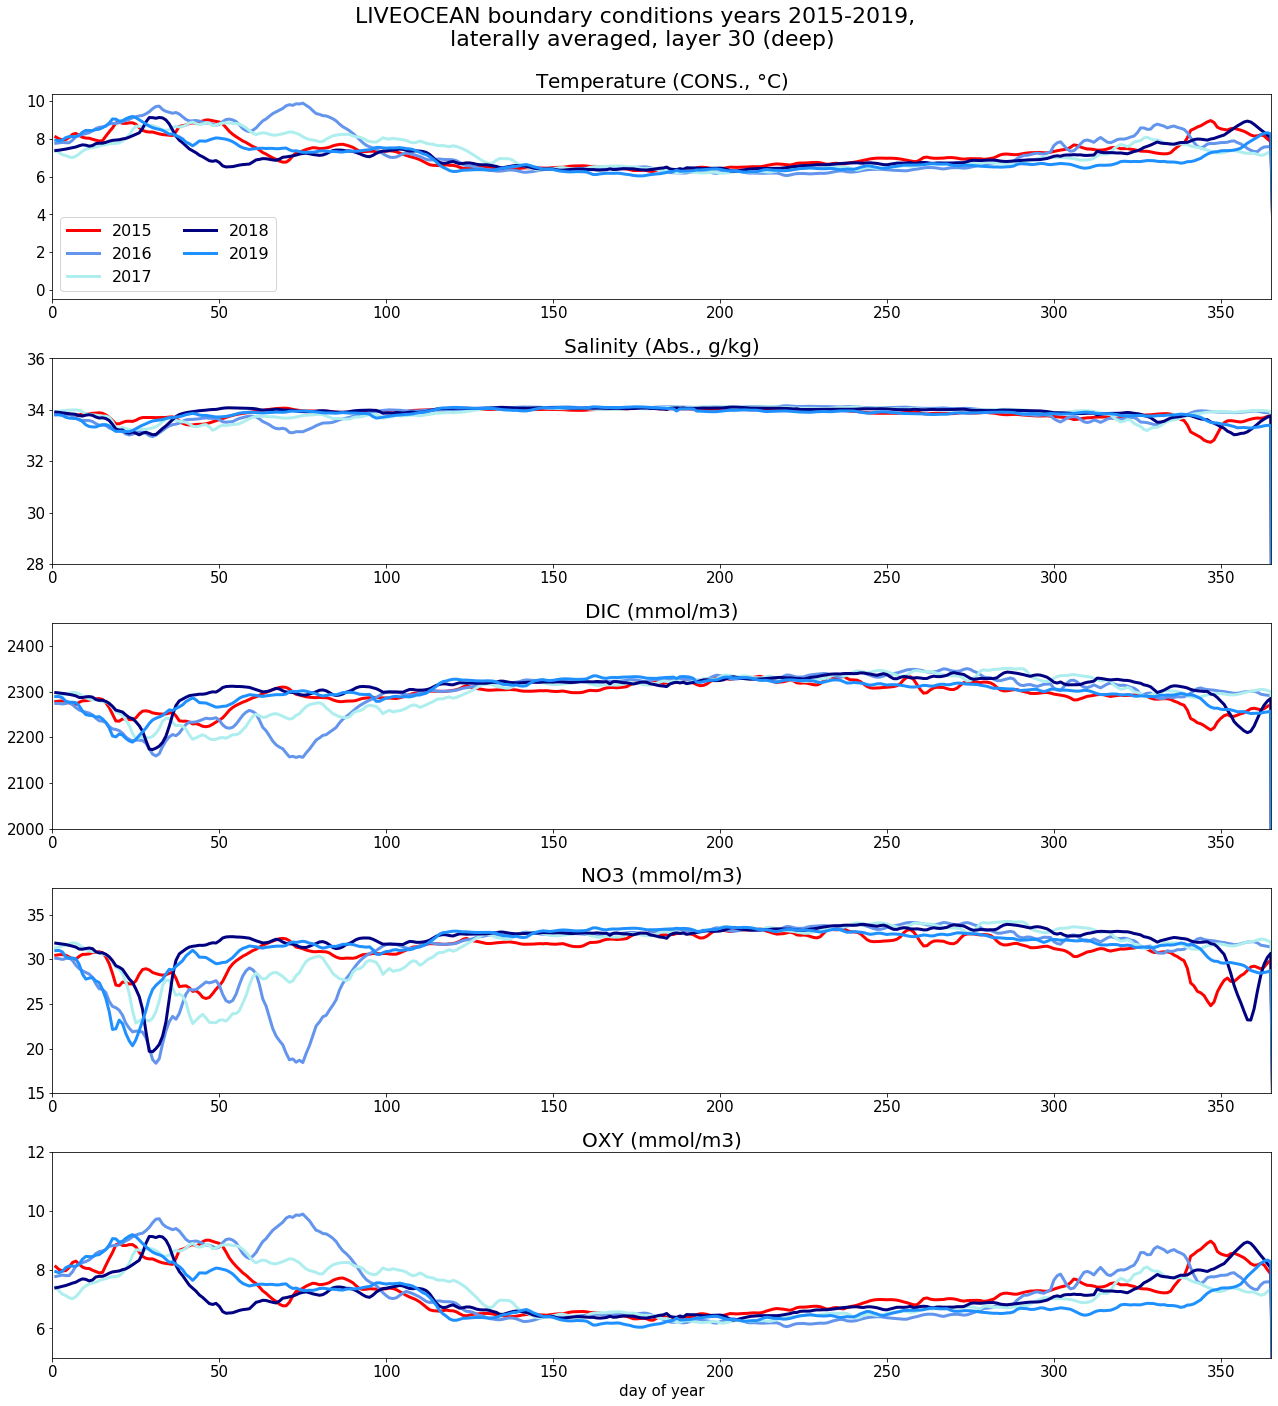

In [106]:
day = np.arange(1,367,1)
fig = plt.figure(figsize=(18,22))

for i in range(1,6):
    ax = fig.add_subplot(6,1,i)

    #puget
    if i == 1:
        ax.plot(day, T_2015[30,:], label = '2015', lw = 3, color='red')
        ax.plot(day, T_2016[30,:], label = '2016', lw = 3, color='cornflowerblue')
        ax.plot(day, T_2017[30,:], label = '2017', lw = 3, color='paleturquoise')
        ax.plot(day, T_2018[30,:], label = '2018', lw = 3, color='navy')
        ax.plot(day, T_2019[30,:], label = '2019', lw = 3, color='dodgerblue')
        
        ax.set_xlim([0,365])
        ax.legend(loc="best", ncol = 2, fontsize = 16 )
        ax.set_title('Temperature (CONS., $\degree$C)', fontsize = 20 )
        
    if i == 2:
        ax.plot(day, S_2015[30,:], label = '2015', lw = 3, color='red')
        ax.plot(day, S_2016[30,:], label = '2016', lw = 3, color='cornflowerblue')
        ax.plot(day, S_2017[30,:], label = '2017', lw = 3, color='paleturquoise')
        ax.plot(day, S_2018[30,:], label = '2018', lw = 3, color='navy')
        ax.plot(day, S_2019[30,:], label = '2019', lw = 3, color='dodgerblue')
        
        ax.set_xlim([0,365])
        ax.set_ylim([28,36])
        #ax.legend(loc="best", ncol = 2, fontsize = 16 )
        ax.set_title('Salinity (Abs., g/kg)', fontsize = 20 )
 
    if i == 3:
        ax.plot(day, DIC_2015[30,:], label = '2015', lw = 3, color='red')
        ax.plot(day, DIC_2016[30,:], label = '2016', lw = 3, color='cornflowerblue')
        ax.plot(day, DIC_2017[30,:], label = '2017', lw = 3, color='paleturquoise')
        ax.plot(day, DIC_2018[30,:], label = '2018', lw = 3, color='navy')
        ax.plot(day, DIC_2019[30,:], label = '2019', lw = 3, color='dodgerblue')
        
        ax.set_xlim([0,365])
        ax.set_ylim([2000,2450])
        #ax.legend(loc="best", ncol = 2, fontsize = 16 )
        ax.set_title('DIC (mmol/m3)', fontsize = 20 )
 
    if i == 4:
        ax.plot(day, NO3_2015[30,:], label = '2015', lw = 3, color='red')
        ax.plot(day, NO3_2016[30,:], label = '2016', lw = 3, color='cornflowerblue')
        ax.plot(day, NO3_2017[30,:], label = '2017', lw = 3, color='paleturquoise')
        ax.plot(day, NO3_2018[30,:], label = '2018', lw = 3, color='navy')
        ax.plot(day, NO3_2019[30,:], label = '2019', lw = 3, color='dodgerblue')
        
        ax.set_xlim([0,365])
        ax.set_ylim([15,38])
        #ax.legend(loc="best", ncol = 2, fontsize = 16 )
        ax.set_title('NO3 (mmol/m3)', fontsize = 20 )
        
    if i == 5:
        ax.plot(day, OXY_2015[30,:], label = '2015', lw = 3, color='red')
        ax.plot(day, OXY_2016[30,:], label = '2016', lw = 3, color='cornflowerblue')
        ax.plot(day, OXY_2017[30,:], label = '2017', lw = 3, color='paleturquoise')
        ax.plot(day, OXY_2018[30,:], label = '2018', lw = 3, color='navy')
        ax.plot(day, OXY_2019[30,:], label = '2019', lw = 3, color='dodgerblue')
        
        ax.set_xlim([0,365])
        ax.set_ylim([5,12])
        #ax.legend(loc="best", ncol = 2, fontsize = 16 )
        ax.set_title('OXY (mmol/m3)', fontsize = 20 )
        ax.set_xlabel('day of year')
plt.suptitle('LIVEOCEAN boundary conditions years 2015-2019, \n laterally averaged, layer 30 (deep)',\
             fontsize = 22, y = 1.03)
plt.tight_layout()